In [5]:
import numpy as np


In [6]:
class perceptron:
    def __init__(self, coef, iteration, randstate=1):
        self.coef = coef
        self.iteration = iteration
        self.randstate= randstate
    def fit(self,X,y):
        rgen=np.random.RandomState(self.randstate)
        self.w_=rgen.normal(loc=0.0,scale=0.1,size=1+X.shape[1])
        self.error_=[]
        
        for i in range(self.iteration):
            errors=0
            for xi,target in zip(X,y):
                update = self.iteration*(target-self.predict(xi))
                self.w_[1:]+=update*xi
                self.w_[0]+=update
                errors += int(update!=0)
            self.error_.append(errors)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    def predict(self,X):
        return np.where(self.net_input(X)>=0,1,-1)
                 
                
                

In [10]:
import pandas as pd
from sklearn import datasets

In [19]:
df = datasets.load_iris()


TypeError: unhashable type: 'slice'

In [15]:
import matplotlib.pyplot as plt
df.iloc[0:100,4]

AttributeError: iloc

In [2]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100,4].values
y = np.where(y=="Setosa",-1,1)
X =df.iloc[0:100,[0,2]].values
plt.scatter(X[0:50,0],X[0:50,1],color="green",marker="*",label="setosa")
plt.scatter(X[50:100,0],X[50:100,1],color="red",marker="o",label="versicolor")
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

NameError: name 'df' is not defined

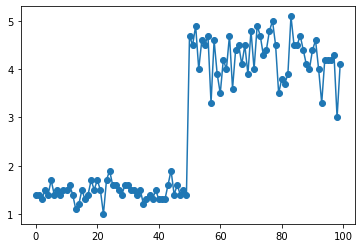

In [73]:
plt.plot(range(100),df.iloc[0:100,2].values,marker="o")

Text(0, 0.5, 'Number of updates')

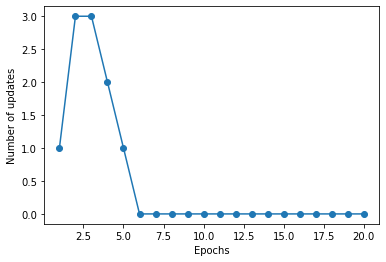

In [44]:
ppn=perceptron(coef=0.01, iteration=20)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.error_) + 1), ppn.error_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')


In [75]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            self.output = self.activation(net_input)
            errors = (y - self.output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

[3.32309308e+45 3.21346222e+45 3.07316295e+45 3.07968433e+45
 3.26827765e+45 3.57954459e+45 3.04901592e+45 3.29894605e+45
 2.93938506e+45 3.24413062e+45 3.51820778e+45 3.21998359e+45
 3.15864679e+45 2.79256442e+45 3.64546430e+45 3.68265408e+45
 3.45687097e+45 3.32309308e+45 3.74399088e+45 3.35376148e+45
 3.57954459e+45 3.35376148e+45 2.92634231e+45 3.41509829e+45
 3.31198880e+45 3.32961446e+45 3.32961446e+45 3.40857692e+45
 3.37790851e+45 3.16516816e+45 3.21998359e+45 3.51820778e+45
 3.40857692e+45 3.54235481e+45 3.24413062e+45 3.20694084e+45
 3.51168640e+45 3.21346222e+45 2.90871665e+45 3.35376148e+45
 3.23760925e+45 2.96353209e+45 2.90871665e+45 3.32961446e+45
 3.47643510e+45 3.15864679e+45 3.38442989e+45 3.04901592e+45
 3.46339235e+45 3.26827765e+45 5.37664360e+45 4.98641420e+45
 5.38316498e+45 4.33973330e+45 5.07189804e+45 4.60270618e+45
 4.99293558e+45 3.79616188e+45 5.12671347e+45 4.14461860e+45
 3.91231412e+45 4.62033183e+45 4.61381046e+45 4.88330471e+45
 4.27187512e+45 5.120192

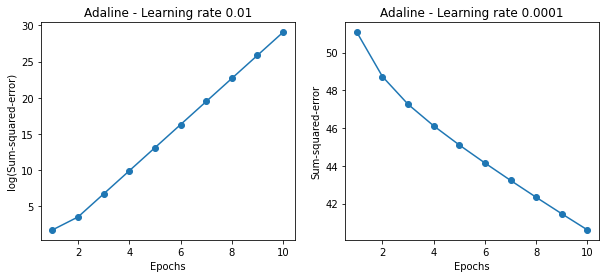

In [77]:
ada=AdalineGD(eta=0.01,n_iter=30)
ada.fit(X,y)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
print(ada.output)
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')


ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [63]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [66]:
ada_gd = AdalineGD(n_iter=20, eta=0.01)
ada_gd.fit(X_std, y)


Text(0, 0.5, 'Sum-squared-error')

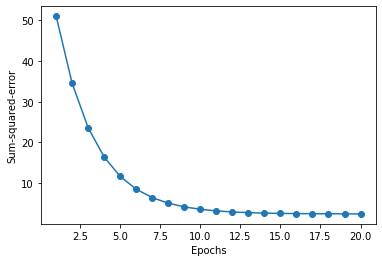

In [67]:
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
